In [2]:
import matplotlib.pyplot as plt
import numpy as np


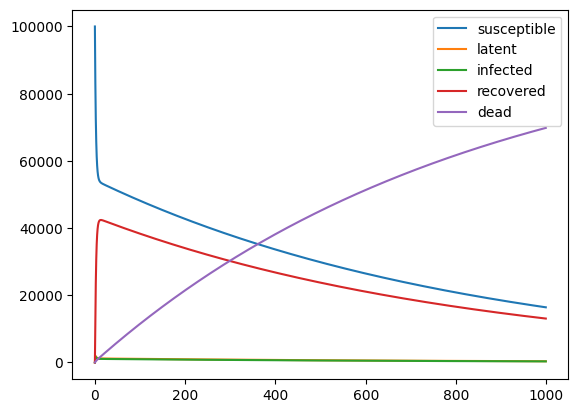

In [215]:
class subpop:
    # defining a population class for the SLIRD model
    # using a linked list structure
    def __init__(self, out_rate1, next1= None, next2 = None, count = 0, out_rate2 = 0) -> None:
        self._out1 = out_rate1
        self.count = count
        self._next1 = next1
        self._next2 = next2
        self._out2 = out_rate2

    def update(self):
        # updating the population count
        temp1 = self.count*(self._out1)
        temp2 = self.count*(self._out2)
        if self._next1 != None:
            self._next1.count += temp1
            self.count -= temp1
        if self._next2 != None:
            self._next2.count += temp2
            self.count -= temp2

delta   = 0.2              # portion that lost immunity
beta    = 0.2              # infection rate
gamma   = 0.9              # recovery rate
alpha   = 0.01               # or lambda -> death rate/lethality
omega   = 0.9              # latency ratio

# initialising the subpopulations
s = subpop(out_rate1=beta, count=100000)
l = subpop(out_rate1=omega)
i = subpop(out_rate1=gamma, out_rate2=alpha)
r = subpop(out_rate1=delta)
d = subpop(out_rate1=0)

# linking the subpopulations
s._next1 = l
l._next1 = i
i._next1 = r
i._next2 = d
r._next1 = s

# simulation
populations = [s, l, i, r, d]
cycles = 1000

# simulation function
def simulate(populations, n = cycles):
    # cycles through the simulation
    for i in range(n):
        count = []
        for subpopulation in populations:
            count.append(subpopulation.count)
        # print('count   :', count)
        for subpopulation in populations:
            subpopulation.update()           # updating the population
        
        yield count

pop_counts = simulate(populations)         # generator object

# extracting the population counts
susceptible = []
latent = []
infection = []
recovery = []
dead = []

for count in pop_counts:
    susceptible.append(count[0])
    latent.append(count[1])
    infection.append(count[2])
    recovery.append(count[3])
    dead.append(count[4])

# plotting the results
plt.plot(susceptible, label='susceptible')
plt.plot(latent, label='latent')
plt.plot(infection, label='infected')
plt.plot(recovery, label='recovered')
plt.plot(dead, label='dead')
plt.legend()


